Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [11]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.2.2', '2.2.3', '0.13.2', '3.10.0')

# 1 Load Data

In [14]:
# Load the csv file into a variable
df = pd.read_csv('./data/Cars.csv')

In [15]:
# Check the headers of the data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [16]:
# Check the shape of the data
df.shape

(8128, 13)

In [17]:
# Check the data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [18]:
# Checking the columns
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

# 2. Exploratory Data Analysis

In [19]:
df = df[df.fuel != "CNG"]
df = df[df.fuel != "LPG"]
df = df[df.owner != "Test Drive Car"]
df.pop("torque")

# Check the shape of the modified data
df.shape

(8028, 12)

Label encoding

In [20]:
map={"First Owner":1,"Second Owner":2,"Third Owner":3,"Fourth & Above Owner":4}
df.replace({"owner":map},inplace=True)

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [21]:
df.mileage = df.mileage.str.split().str[0]
df.mileage = df.mileage.astype(float)

df.engine = df.engine.str.split().str[0]
df.engine = df.engine.astype(float)

df.max_power = df.max_power.str.split().str[0]
df.max_power = df.max_power.astype(float)

df.name = df.name.str.split().str[0]

In [22]:
# Checking if modifications and data type changes are applied
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


In [23]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


Univariate analysis

Count Plot

<Axes: xlabel='fuel', ylabel='count'>

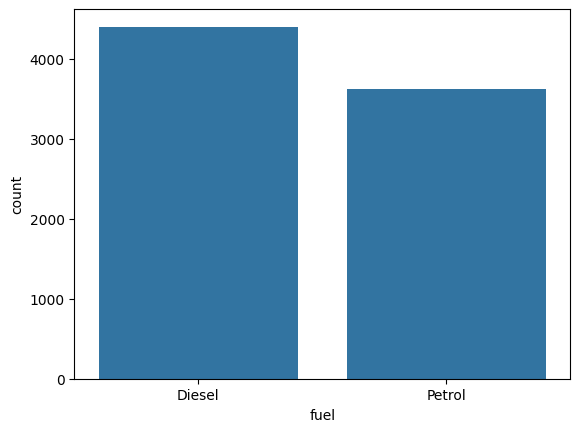

In [24]:
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='transmission', ylabel='count'>

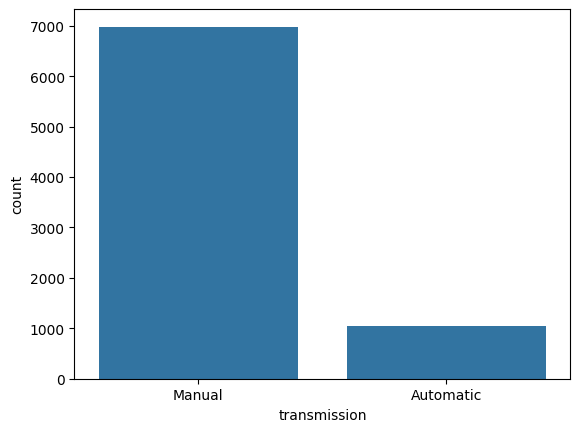

In [25]:
sns.countplot(data = df, x = 'transmission')

<Axes: xlabel='seats', ylabel='count'>

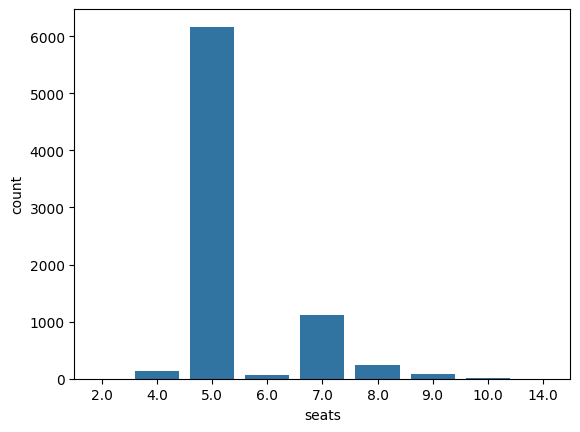

In [26]:
sns.countplot(data = df, x = 'seats')

Distribution Plot

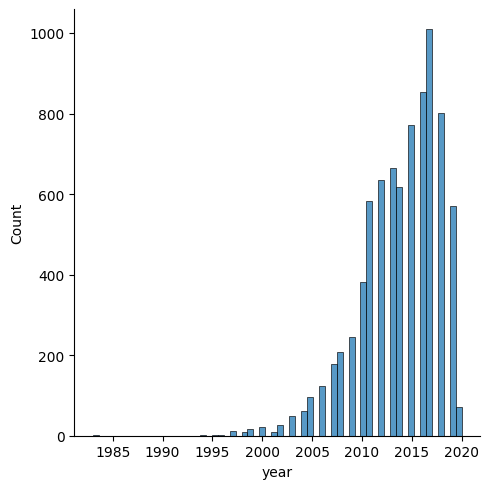

In [27]:
sns.displot(data = df, x = 'year')

Multivariate Analysis

Box Plot

Text(0.5, 0, 'No. of previous owners')

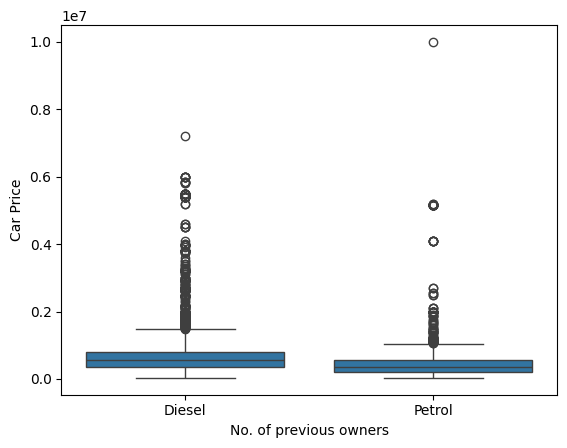

In [28]:
sns.boxplot(x = df.fuel, y = df.selling_price)
plt.ylabel("Car Price")
plt.xlabel("No. of previous owners")

Scatter Plot

<Axes: xlabel='year', ylabel='selling_price'>

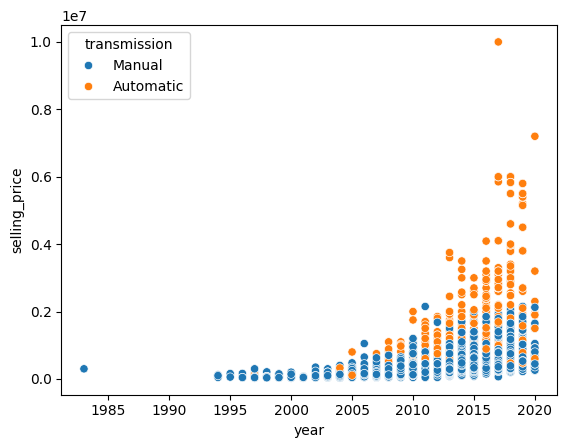

In [29]:
sns.scatterplot(x = df.year, y = df.selling_price, hue = df.transmission)

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.name = le.fit_transform(df.name)

df.name.unique()

array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

In [31]:
# Check to see what each number maps to
le.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [32]:
# Saving the names and what they map to in a dictionary to put into model file
name_map = {}
keys = le.classes_
values = df.name.unique()
for key in keys:
    for value in values:
        name_map[key] = value
        values = np.delete(values, np.where(values == value))
        break

name_map

{'Ambassador': np.int64(20),
 'Ashok': np.int64(27),
 'Audi': np.int64(10),
 'BMW': np.int64(11),
 'Chevrolet': np.int64(29),
 'Daewoo': np.int64(9),
 'Datsun': np.int64(26),
 'Fiat': np.int64(19),
 'Force': np.int64(28),
 'Ford': np.int64(4),
 'Honda': np.int64(7),
 'Hyundai': np.int64(6),
 'Isuzu': np.int64(14),
 'Jaguar': np.int64(21),
 'Jeep': np.int64(22),
 'Kia': np.int64(2),
 'Land': np.int64(30),
 'Lexus': np.int64(3),
 'MG': np.int64(23),
 'Mahindra': np.int64(17),
 'Maruti': np.int64(13),
 'Mercedes-Benz': np.int64(16),
 'Mitsubishi': np.int64(18),
 'Nissan': np.int64(31),
 'Opel': np.int64(5),
 'Peugeot': np.int64(15),
 'Renault': np.int64(8),
 'Skoda': np.int64(0),
 'Tata': np.int64(1),
 'Toyota': np.int64(12),
 'Volkswagen': np.int64(24),
 'Volvo': np.int64(25)}

In [33]:
df.fuel = le.fit_transform(df.fuel)

df.fuel.unique()

array([0, 1])

In [34]:
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [35]:
df.seller_type = le.fit_transform(df.seller_type)

df.seller_type.unique()

array([1, 0, 2])

In [36]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [37]:
df.transmission = le.fit_transform(df.transmission)

df.transmission.unique()

array([1, 0])

In [38]:
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   int64  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int64  
 5   seller_type    8028 non-null   int64  
 6   transmission   8028 non-null   int64  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 815.3 KB


Correlation Matrix

<Axes: >

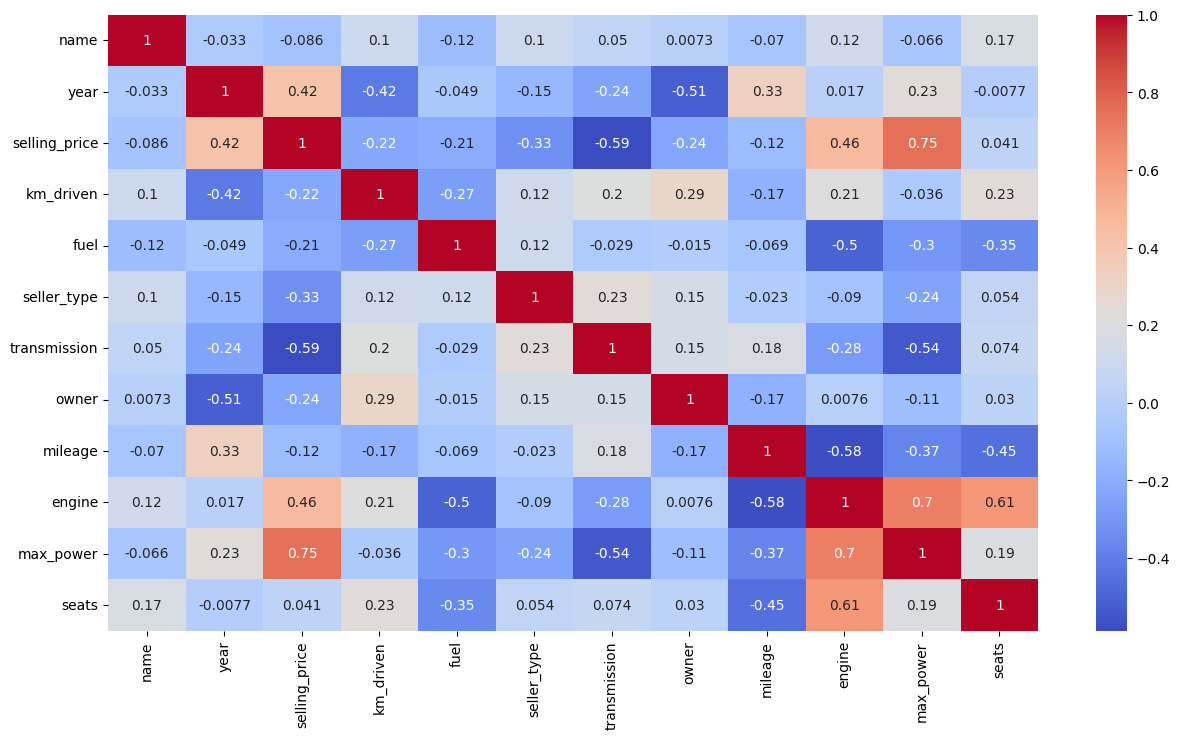

In [40]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

# 3 Feature Selection

In [41]:
x = df[["name", "engine", "mileage"]]
#y = df["selling_price"]
y = np.log(df["selling_price"])

Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 24)

# 4 Preprocessing

In [43]:
# Check for null values
X_train[['name', 'engine', 'mileage']].isna().sum()

name         0
engine     173
mileage    173
dtype: int64

In [44]:
X_test[['name', 'engine', 'mileage']].isna().sum()

name        0
engine     41
mileage    41
dtype: int64

In [45]:
y_train.isna().sum()

np.int64(0)

In [ ]:
y_test.isna().sum()

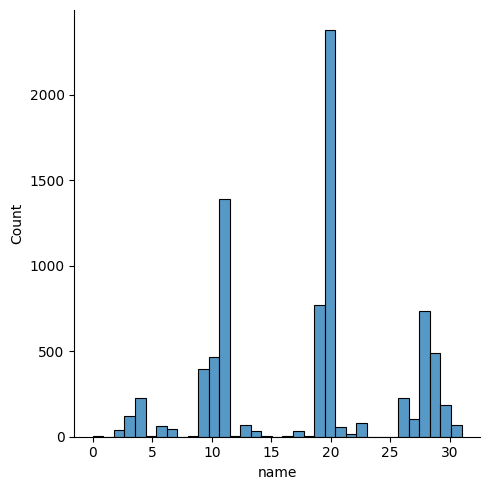

In [46]:
sns.displot(data=df, x='name')

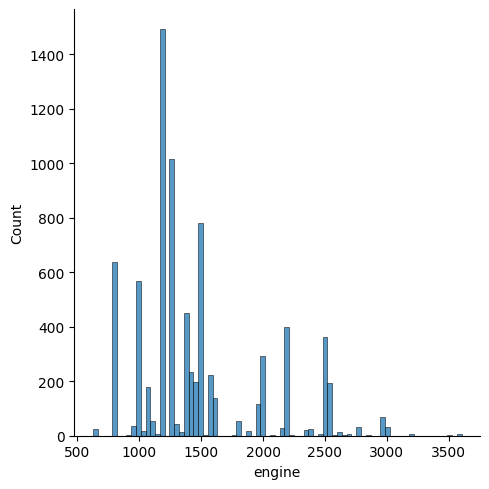

In [47]:
sns.displot(data=df, x='engine')

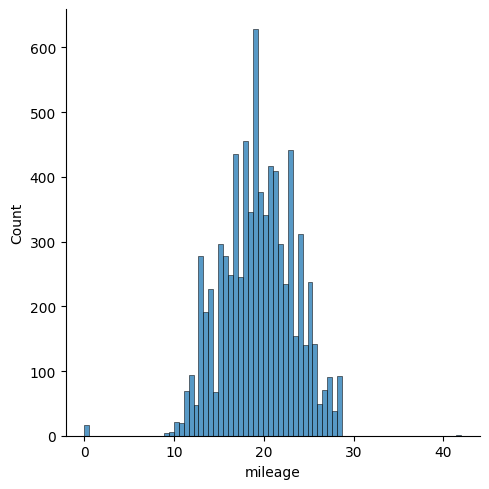

In [48]:
sns.displot(data=df, x='mileage')

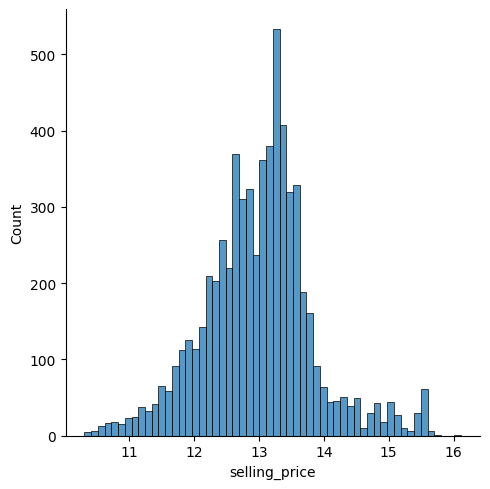

In [49]:
sns.displot(y_train)

In [50]:
# Saving values to put into model file
engine_default = X_train['engine'].median()
mileage_default = X_train['mileage'].mean()

In [51]:

# Training set
# Dropping the name column
X_train['name'].dropna()

# Filling the other columns
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [52]:
# Testing set
X_test['name'].dropna()
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [53]:
# Doing the same for labels
y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_test.median(), inplace=True)

In [54]:
# Checking values
X_train[['name', 'engine', 'mileage']].isna().sum()

name       0
engine     0
mileage    0
dtype: int64

In [55]:
X_test[['name', 'engine', 'mileage']].isna().sum()

name       0
engine     0
mileage    0
dtype: int64

In [ ]:
y_train.isna().sum()

In [56]:
y_test.isna().sum()

np.int64(0)

Checking outliers

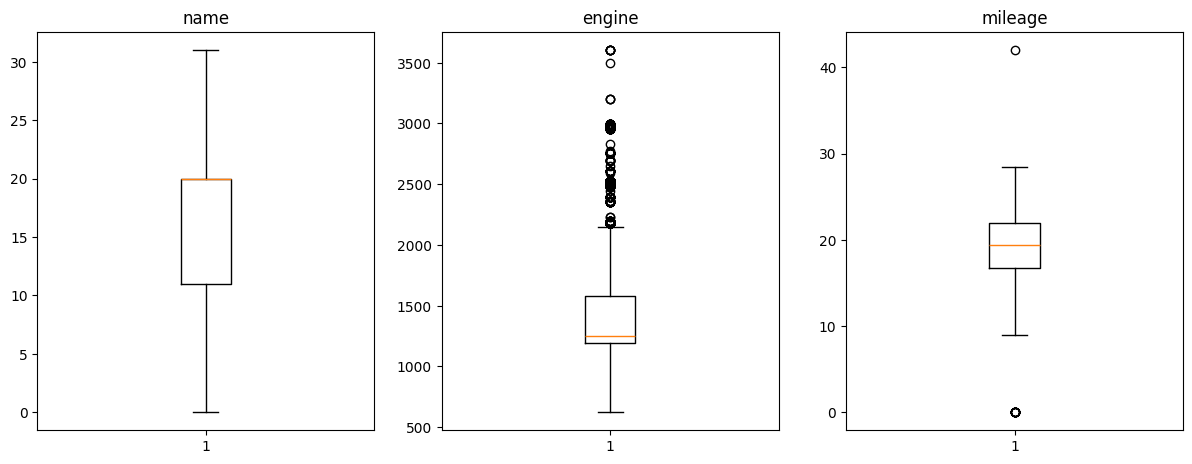

In [57]:
# Create a dictionary of columns.
col_dict = {'name':1,'engine':2,'mileage':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [58]:
def outlier_count(col, data = X_train):
    
    # Calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # Calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # Count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # Calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [59]:
for col in X_train.columns:
    outlier_count(col)


---------------engine---------------

Number of outliers: 982
Percent of data that is outlier: 15.29%

---------------mileage---------------

Number of outliers: 15
Percent of data that is outlier: 0.23%


Scaling

In [60]:
from sklearn.preprocessing import StandardScaler

# Feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [61]:
# Shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 3)
Shape of X_test:  (1606, 3)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


# 5.Modeling

Cross-validation & Grid search

In [62]:
# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# List of models
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]
from sklearn.model_selection import KFold, cross_val_score

# Lists for keeping mse
train_mse = []
test_mse = []

# Defining splits
kfold = KFold(n_splits=10, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.4673733  -0.46034158 -0.41177262 -0.50066549 -0.44199012 -0.41927722
 -0.47803355 -0.41504627 -0.41821391 -0.4212503 ]; Mean: -0.44339643593711964
SVR - Score: [-0.29350872 -0.30046163 -0.29743342 -0.32366643 -0.29588943 -0.26020828
 -0.2538334  -0.30392159 -0.37756952 -0.34504587]; Mean: -0.3051538289996487
KNeighbors Regressor - Score: [-0.11498739 -0.14572551 -0.10273306 -0.12745835 -0.1220523  -0.11387467
 -0.15759245 -0.1019283  -0.10296338 -0.11498166]; Mean: -0.12042970696857666
Decision-Tree Regressor - Score: [-0.08101371 -0.07680263 -0.11436393 -0.11953404 -0.09676016 -0.10827278
 -0.08762547 -0.09243263 -0.08554722 -0.09449134]; Mean: -0.09568439156790504
Random-Forest Regressor - Score: [-0.09825441 -0.08551941 -0.08438212 -0.08813818 -0.06622253 -0.09632159
 -0.09014275 -0.07649663 -0.09731724 -0.07441354]; Mean: -0.08572084045388442


Grid Search

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5,10,None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 42)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

grid.fit(X_train, y_train);

In [64]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 15}

In [65]:
# Find grid_search's best score
best_mse = grid.best_score_
best_mse

np.float64(-0.08783026236592231)

In [66]:
# Save the model,scaler and values together
model = {
    'model': grid,
    'scaler': scaler,
    'engine_default' : engine_default,
    'mileage_default' : mileage_default,
    'name_map' : name_map
}

# 6. Testing

In [67]:
from sklearn.metrics import mean_squared_error
yhat = grid.predict(X_test)
#yhat = np.exp(yhat) 
# Does not need to be transformed since grid already gives a log transformed yhat
mean_squared_error(y_test, yhat)

0.08764093524672509

Feature Importane

In [68]:
rf = grid.best_estimator_

rf.feature_importances_

array([0.13816752, 0.52441352, 0.33741896])

<BarContainer object of 3 artists>

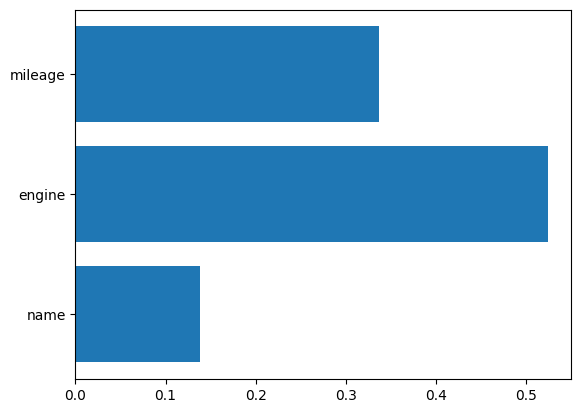

In [69]:
# Plotting
plt.barh(x.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

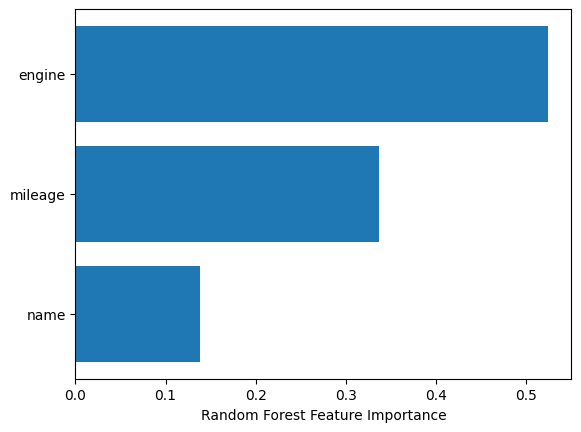

In [70]:
# Sorting the feature importance
sorted_idx = rf.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

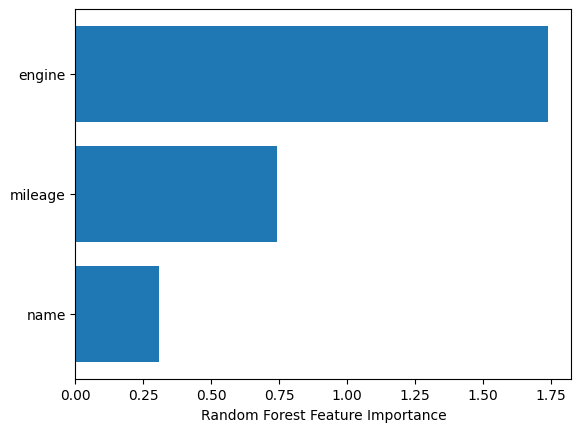

In [71]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

# Let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(x.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# Save the Model

In [72]:
import pickle

# Save the model to disk
filename = 'app/code/model/car_price_old.model'
pickle.dump(model, open(filename, 'wb'))

In [73]:
# Load the model from disk
loaded_data = pickle.load(open(filename, 'rb'))

In [74]:
# Loading the model and scaler to test
loaded_model = loaded_data['model']
loaded_scaler = loaded_data['scaler']

In [75]:
# Test the model with a sample input
df[['name', 'engine', 'mileage', 'selling_price']].loc[7898]

name                 20.00
engine             1248.00
mileage              24.52
selling_price    795000.00
Name: 7898, dtype: float64

In [76]:
#['name', 'engine', 'mileage'] 
sample = np.array([[20, 1248, 24.52]])

# Scaling the sample data to feed the model
sample_scaled = loaded_scaler.transform(sample)
sample_scaled

array([[ 0.27182549, -0.43479265,  1.30098695]])

In [77]:
# Predicting and taking the exponent to show the predicted car price
predicted_car_price = loaded_model.predict(sample_scaled)
predicted_car_price = np.exp(predicted_car_price)
predicted_car_price

array([796385.83174631])